### Wordclouds

I will plot a wordcloud with books by Jane Austen.

In [2]:
library(tidytext)
library(janeaustenr)
library(dplyr)
library(stringr)
library(wordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: RColorBrewer



Joining, by = "word"



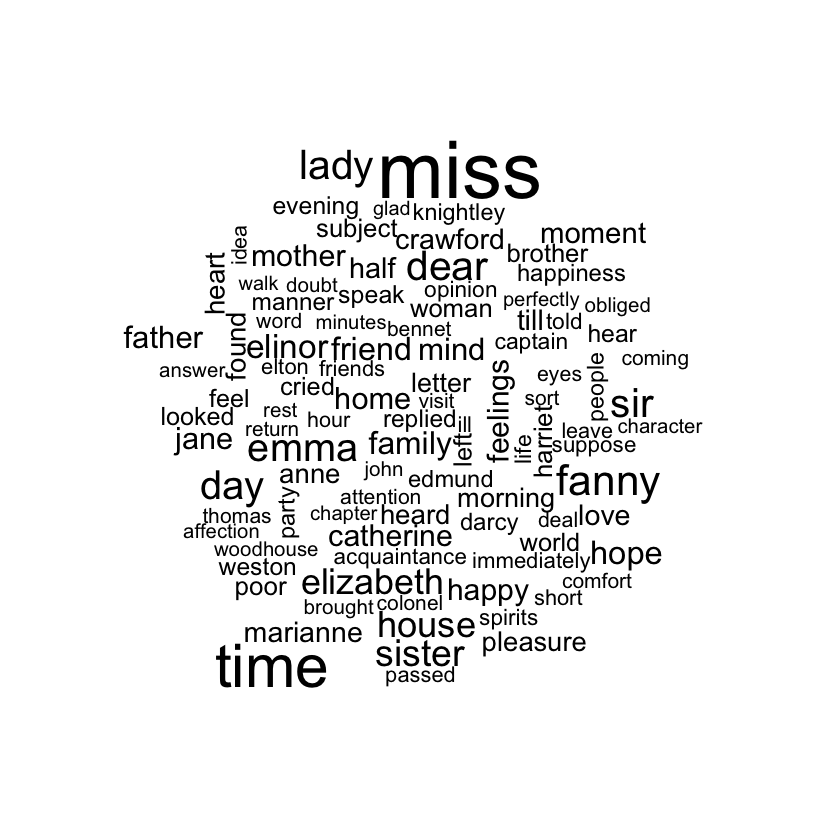

In [3]:
tidy_books <- austen_books() %>%
    group_by(book) %>%
    mutate(linenumber = row_number(),
           chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", ignore_case = TRUE)))) %>%
    ungroup() %>% unnest_tokens(word, text)

tidy_books %>%
    anti_join(stop_words) %>%
    count(word) %>%
    with(wordcloud(word, n, max.words = 100))

Joining, by = "word"



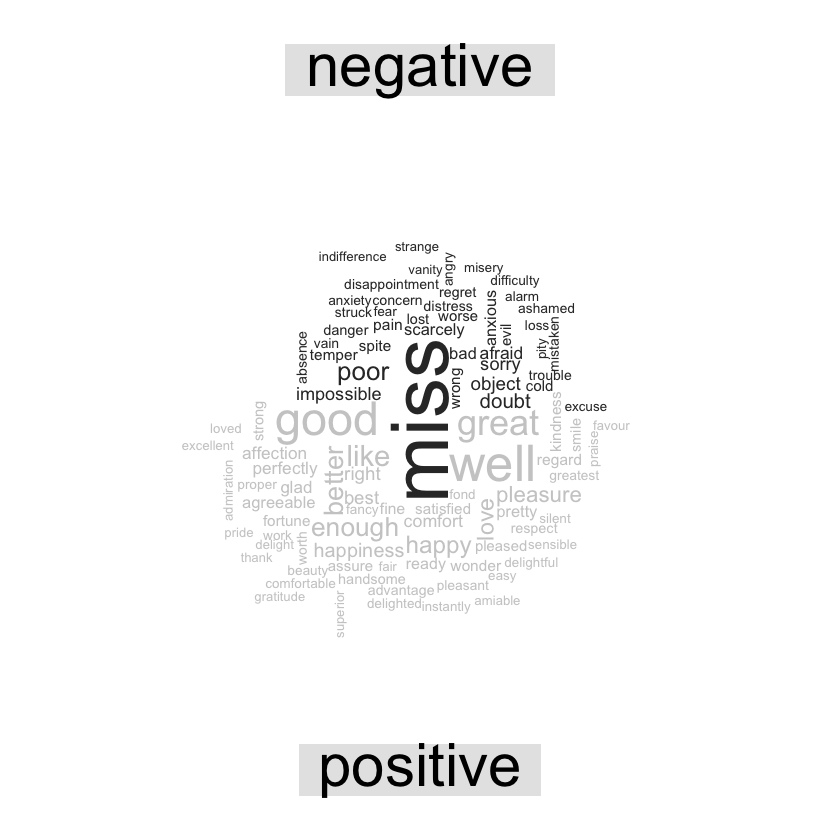

In [4]:
# Sentiment Analysis with "bing" lexicon
library(reshape2)

tidy_books %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sentiment, sort = TRUE) %>%
    acast(word ~ sentiment, value.var = "n", fill = 0) %>%
    comparison.cloud(colors = c("gray20", "gray80"), max.words = 100)

### Frequency: tf-idf

Identify the most significant words in Jane Austen's books using "tf-idf".

In [22]:
library(dplyr)
library(janeaustenr)
library(tidytext)

book_words <- austen_books() %>%
    unnest_tokens(word, text) %>%
    count(book, word, sort = TRUE)

total_words <- book_words %>%
    group_by(book) %>%
    summarise(total = sum(n))

book_words <- book_words %>%
    left_join(total_words) %>%
    mutate(term_frequency = n/total)

book_words

Joining, by = "book"



book,word,n,total,term_frequency
Mansfield Park,the,6206,160465,0.03867510
Mansfield Park,to,5475,160465,0.03411959
Mansfield Park,and,5438,160465,0.03388901
Emma,to,5239,160996,0.03254118
Emma,the,5201,160996,0.03230515
Emma,and,4896,160996,0.03041069
Mansfield Park,of,4778,160465,0.02977596
Pride & Prejudice,the,4331,122204,0.03544074
Emma,of,4291,160996,0.02665284
Pride & Prejudice,to,4162,122204,0.03405780


In [23]:
book_words <- book_words %>%
    bind_tf_idf(word, book, n)
book_words

book,word,n,total,term_frequency,tf,idf,tf_idf
Mansfield Park,the,6206,160465,0.03867510,0.03867510,0,0
Mansfield Park,to,5475,160465,0.03411959,0.03411959,0,0
Mansfield Park,and,5438,160465,0.03388901,0.03388901,0,0
Emma,to,5239,160996,0.03254118,0.03254118,0,0
Emma,the,5201,160996,0.03230515,0.03230515,0,0
Emma,and,4896,160996,0.03041069,0.03041069,0,0
Mansfield Park,of,4778,160465,0.02977596,0.02977596,0,0
Pride & Prejudice,the,4331,122204,0.03544074,0.03544074,0,0
Emma,of,4291,160996,0.02665284,0.02665284,0,0
Pride & Prejudice,to,4162,122204,0.03405780,0.03405780,0,0


In [24]:
book_words %>%
    select(-total) %>%
    arrange(desc(tf_idf))

book,word,n,term_frequency,tf,idf,tf_idf
Sense & Sensibility,elinor,623,0.005193355,0.005193355,1.7917595,0.009305242
Sense & Sensibility,marianne,492,0.004101333,0.004101333,1.7917595,0.007348602
Mansfield Park,crawford,493,0.003072321,0.003072321,1.7917595,0.005504860
Pride & Prejudice,darcy,373,0.003052273,0.003052273,1.7917595,0.005468939
Persuasion,elliot,254,0.003036171,0.003036171,1.7917595,0.005440088
Emma,emma,786,0.004882109,0.004882109,1.0986123,0.005363545
Northanger Abbey,tilney,196,0.002519928,0.002519928,1.7917595,0.004515105
Emma,weston,389,0.002416209,0.002416209,1.7917595,0.004329266
Pride & Prejudice,bennet,294,0.002405813,0.002405813,1.7917595,0.004310639
Persuasion,wentworth,191,0.002283105,0.002283105,1.7917595,0.004090775


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Selecting by tf_idf



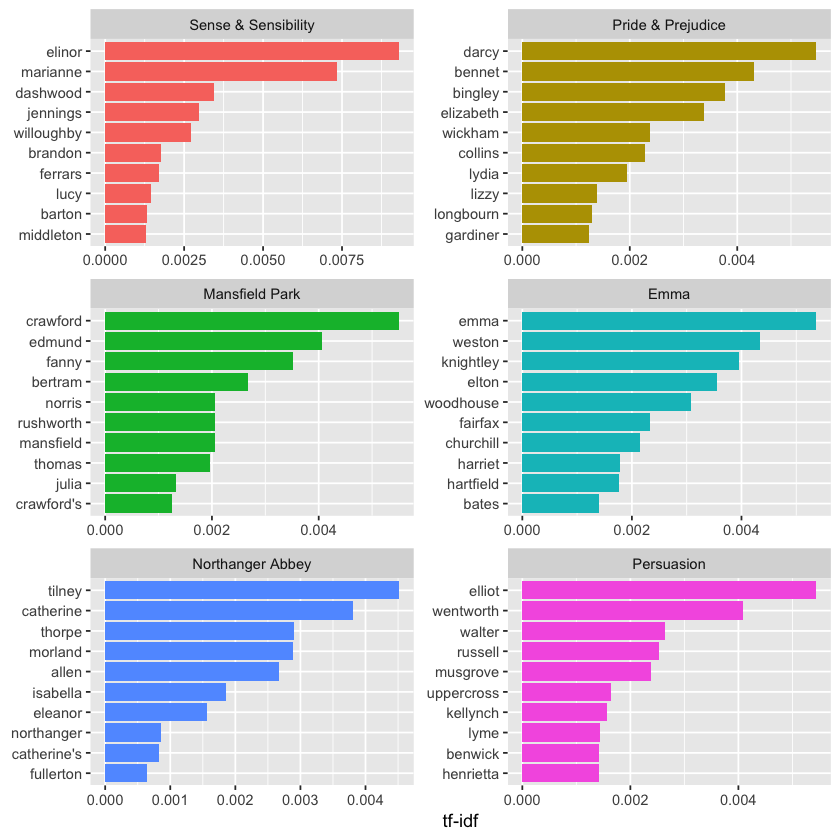

In [26]:
library(ggplot2)

book_words %>%
    arrange(desc(tf_idf)) %>%
    mutate(word = factor(word, levels = rev(unique(word)))) %>%
    group_by(book) %>%
    top_n(10) %>%
    ungroup %>%
    ggplot(aes(word, tf_idf, fill = book)) +
    geom_col(show.legend = FALSE) +
    labs(x = NULL, y = "tf-idf") +
    facet_wrap(~ book, ncol = 2, scales = "free") +
    coord_flip()

In the above plot, it seems that the words with the highest tf-idf are names, and it should make sense.